# Υπολογιστική Γεωμετρία
Ονοματεπώνυμο: Καλλιόπη-Χριστίνα Δεσποτίδου
<br>
ΑΜ: 1115202000045



**Υλοποίηση Α: Κυρτό Περίβλημα**

In [1]:
#Import libraries
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from tabulate import tabulate
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from math import sqrt, pow, atan2, pi, degrees
import random
from scipy.optimize import linprog
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay

**Αυξητικός Αλγόριθμος**

In [ ]:
# Incremental algorithm using Graham's Scan
def incremental_algorithm(points):
    # Sort points by their x and y coordinates
    points = sorted(points, key=lambda p: (p.x, p.y))

    # Initialize the upper hull with the first two points
    upper_hull = [points[0], points[1]]

    # Build the upper hull
    for i in range(2, len(points)):
        # Add the current point to the upper hull
        upper_hull.append(points[i])

        # While the last three points do not make a clockwise turn, remove the middle point
        while len(upper_hull) > 2 and not is_CW(upper_hull[-3], upper_hull[-2], upper_hull[-1]):
            upper_hull.pop(-2)

    # Initialize the lower hull with the last two points
    lower_hull = [points[-1], points[-2]]

    # Build the lower hull
    for i in range(len(points) - 3, -1, -1):
        # Add the current point to the lower hull
        lower_hull.append(points[i])

        # While the last three points do not make a clockwise turn, remove the middle point
        while len(lower_hull) > 2 and not is_CW(lower_hull[-3], lower_hull[-2], lower_hull[-1]):
            lower_hull.pop(-2)

    # Remove the first and last points from the lower hull to avoid duplicating points at the junction
    lower_hull.pop(0)
    lower_hull.pop(-1)

    # Combine the upper and lower hulls to form the full convex hull
    convex_hull = upper_hull + lower_hull

    return convex_hull

**Αλγόριθμος Περιτυλίγματος**

In [ ]:
# Gift wrapping algorithm
def gift_wrapping(points):
    n = len(points)  # Number of points in the input set
    hull = []  # List to store the points of the convex hull

    # Find the leftmost point (with the smallest x-coordinate, and if tied, smallest y-coordinate)
    leftmost = min(points, key=lambda p: (p.x, p.y))
    point_on_hull = leftmost  # Start with the leftmost point

    while True:
        # Add the current point to the convex hull
        hull.append(point_on_hull)
        endpoint = points[0]  # Start with the first point as the endpoint

        # Iterate over all points to find the endpoint that is the farthest to the left
        for i in range(1, n):
            # If the endpoint is the same as the current point on hull, or if the current point is to the left of the endpoint
            if endpoint == point_on_hull or is_CCW(hull[-1], endpoint, points[i]):
                endpoint = points[i]  # Update the endpoint to the current point

        # Move to the next point on the hull
        point_on_hull = endpoint

        # Break the loop if we have returned to the starting point
        if point_on_hull == leftmost:
            break

    return hull

**Αλγόριθμος Διαίρει και Βασίλευε**

In [ ]:
# Divide and Conquer algorithm
def divide_and_conquer(points):
    # Sort the points based on x-coordinate
    points = sorted(points, key=lambda p: (p.x, p.y))
    n = len(points)

    # Base case: Use brute force method for 5 or fewer points
    if n <= 5:
        return bruteHull(points)

    # Divide points into two subsets
    mid = n // 2
    left_points = points[:mid]
    right_points = points[mid:]

    # Recursively compute CH for the subsets
    left_hull = divide_and_conquer(left_points)
    right_hull = divide_and_conquer(right_points)

    # Merge the convex hulls
    merged_hull = merge(left_hull, right_hull)

    # Sort the merged hull points in clockwise order
    sorted_hull = clockwise_sort(merged_hull)

    return sorted_hull

**Αλγόριθμος QuickHull**

In [ ]:
# Quickhull algorithm
def quick_hull(points):
    hull = ConvexHull(np.array([[p.x, p.y] for p in points]))
    return hull

**Βοηθητικές Συναρτήσεις**

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Helper functions for determining the direction of turn

def is_CCW(a, b, c):
    # Determines if the turn from point a to b to c is counterclockwise
    return (b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x) > 0

def is_CW(a, b, c):
    # Determines if the turn from point a to b to c is clockwise
    return (b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x) < 0

# Function to calculate the orientation of three points
def orientation(p0, p1, p2):
    # Calculates the orientation of the triplet (p0, p1, p2)
    # Positive value indicates a counterclockwise turn
    # Negative value indicates a clockwise turn
    # Zero indicates collinear points
    return (p1.y - p0.y) * (p2.x - p1.x) - (p2.y - p1.y) * (p1.x - p0.x)

def ExtremePoint(S, find_max=True):
    # Finds the extreme point in a set S based on x-coordinate
    # If find_max is True, finds the rightmost point
    # If find_max is False, finds the leftmost point
    index = 0
    for i in range(1, len(S)):
        if (S[i].x > S[index].x if find_max else S[i].x < S[index].x):
            index = i
        elif S[i].x == S[index].x:
            if (S[i].y > S[index].y if find_max else S[i].y < S[index].y):
                index = i
    return index

# Helper function used by Divide and Conquer algorithm
def merge(CH1, CH2):
  # Merges two convex hulls CH1 and CH2 into one
  n1, n2 = len(CH1), len(CH2)

  # Find the rightmost point in CH1 and the leftmost point in CH2
  l1 = ExtremePoint(CH1, find_max=True)
  l2 = ExtremePoint(CH2, find_max=False)

  # Find the upper tangent (bridge) between CH1 and CH2
  uppertangent = (CH1[l1], CH2[l2])
  j, i = l1, l2
  done = False

  while not done:
      done = True

      #while it is not tangent to right polygon
      while(orientation(uppertangent[0], uppertangent[1], CH2[(i + 1) % n2]) <= 0):
        i = (i + 1) % n2
        uppertangent = (uppertangent[0], CH2[i])

      #while it is not tangent to left polygon
      while(orientation(uppertangent[1], uppertangent[0], CH1[(j - 1) % n1]) >= 0):
        done = False
        j = (j - 1) % n1
        uppertangent = (CH1[j], uppertangent[1])

  upper1, upper2 = j, i

  #find lower tangent(bridge)
  lowertangent = (CH1[l1], CH2[l2])
  j, i = l1, l2
  done = False

  while not done:
      done = True
      #while it is not tangent to right polygon
      while(orientation(lowertangent[0], lowertangent[1], CH2[(i - 1) % n2]) >= 0):
        i = (i - 1) % n2
        lowertangent = (lowertangent[0], CH2[i])

      #while it is not tangent to left polygon
      while(orientation(lowertangent[1], lowertangent[0], CH1[(j + 1) % n1]) <= 0):
        done = 0
        j = (j + 1) % n1
        lowertangent = (CH1[j], lowertangent[1])

  lower1, lower2 = j, i

  #merge the 2 CH
  merged = [uppertangent[0], uppertangent[1]]

  if upper2 != lower2:
      k = (upper2+1) % n2
      while k != lower2:
        merged.append(CH2[k])
        k = (k + 1) % n2

  if upper2 != lower2:
    if lower1 != upper1:
      merged.extend([lowertangent[1], lowertangent[0]])
    else:
      merged.append(lowertangent[1])
  else:
    if lower1 != upper1:
      merged.append(lowertangent[0])

  if lower1 != upper1:

      w = (lower1 + 1) % n1
      while w != upper1:
        merged.append(CH1[w])
        w = (w + 1) % n1

  return merged

def get_clockwise_angle(point, center):
    # Calculates the clockwise angle of a point relative to a center
    x = point[0] - center[0]
    y = point[1] - center[1]
    angle = math.atan2(y, x)
    if angle < 0:
        angle += 2 * math.pi
    return angle

def clockwise_sort(points):
    # Sorts points in clockwise order around their centroid
    center = (
        sum(point.x for point in points) / len(points),
        sum(point.y for point in points) / len(points)
    )
    sorted_points = sorted(points, key=lambda point: get_clockwise_angle((point.x, point.y), center), reverse=True)
    return sorted_points

# Brute-force convex hull algorithm
def bruteHull(points):
    # Finds the convex hull of a set of points using a brute-force approach
    polygon = []
    for p0 in points:
        for p1 in points:
            if p0 == p1:
                continue
            flag = True
            for p2 in points:
                if p2 in (p0, p1):
                    continue
                if is_CCW(p0, p1, p2):
                    flag = False
                    break
            if flag:
                polygon.extend([p0, p1])
    # Sorts the points of the polygon in clockwise order
    polygon = clockwise_sort(polygon)
    return polygon

############################## Plot Functions #################################

def plot_convex_hull(hull, points, title):
    plt.figure()
    plt.title(title)
    hull.append(hull[0])  # Κλείσιμο πολυγώνου
    xs, ys = zip(*[(p.x, p.y) for p in hull])
    plt.plot(xs, ys, 'b-', lw=2)
    plt.plot([p.x for p in points], [p.y for p in points], 'p')
    plt.show()

def print_hull_table(hull):
    table = [[f"Point {i+1}", point.x, point.y] for i, point in enumerate(hull)]
    print(tabulate(table, headers=["#", "X", "Y"], tablefmt="grid"))

def benchmark_algorithms(num_points_list, question=1):
    results = []

    for N in num_points_list:
        print(f"\nTesting with {N} points...\n")
        points = [Point(np.random.uniform(0, 200), np.random.uniform(0, 200)) for _ in range(N)]

        # Incremental Algorithm
        t0 = time.time()
        hull_incr = incremental_algorithm(points)
        t1 = time.time()
        incr_time = t1 - t0

        # Gift Wrapping Algorithm
        t0 = time.time()
        hull_gift = gift_wrapping(points)
        t1 = time.time()
        gift_time = t1 - t0

        # QuickHull Algorithm
        t0 = time.time()
        hull_quick = quick_hull(points)
        t1 = time.time()
        quick_time = t1 - t0

        # Divide and Conquer Algorithm
        t0 = time.time()
        hull_divide = divide_and_conquer(points)
        t1 = time.time()
        divide_time = t1 - t0

        if question==1 :
          # Incremental Algorithm

          print(f"\033[1m\n\nIncremental Algorithm took {incr_time:.4f} seconds.\033[0m")
          print(f"\033[1mIncremental Algorithm - Generated points:\033[0m")
          print_hull_table(hull_incr)
          plot_convex_hull(hull_incr, points, "Incremental Algorithm")

          # Gift Wrapping Algorithm
          print(f"\033[1m\n\nGift Wrapping took {gift_time:.4f} seconds.\033[0m")
          print(f"\033[1mGift Wrapping Algorithm - Generated points:\033[0m")
          print_hull_table(hull_incr)
          plot_convex_hull(hull_gift, points, "Gift Wrapping Algorithm")

          # QuickHull Algorithm
          print(f"\033[1m\n\nQuickHull took {quick_time:.4f} seconds.\033[0m")
          print(f"\033[1mQuickHull Algorithm - Generated points:\033[0m")
          quick_hull_points = [points[i] for i in hull_quick.vertices]
          print_hull_table(quick_hull_points)
          plot_convex_hull(quick_hull_points, points, "QuickHull Algorithm")

          # Divide and Conquer Algorithm
          print(f"\033[1m\n\nDivide and Conquer took {divide_time:.4f} seconds.\033[0m")
          print(f"\033[1mDivide and Conquer Algorithm - Generated points:\033[0m")
          print_hull_table(quick_hull_points)
          plot_convex_hull(hull_divide, points, "Divide and Conquer Algorithm")

          return

        # Store results
        results.append({
            "Points": N,
            "Incremental": incr_time,
            "Gift Wrapping": gift_time,
            "QuickHull": quick_time,
            "Divide and Conquer": divide_time
        })

    # Print results
    print("\nBenchmark Results:")
    print(f"{'Points':<10} {'Incremental':<15} {'Gift Wrapping':<15} {'QuickHull':<15} {'Divide and Conquer':<20}")
    for result in results:
        print(f"{result['Points']:<10} {result['Incremental']:<15.4f} {result['Gift Wrapping']:<15.4f} {result['QuickHull']:<15.4f} {result['Divide and Conquer']:<20.4f}")

    # Plot results
    plot_results(results)

def plot_results(results):
    points = [result["Points"] for result in results]
    incremental_times = [result["Incremental"] for result in results]
    gift_wrapping_times = [result["Gift Wrapping"] for result in results]
    quick_hull_times = [result["QuickHull"] for result in results]
    divide_and_conquer_times = [result["Divide and Conquer"] for result in results]

    plt.figure(figsize=(12, 8))
    plt.plot(points, incremental_times, label="Incremental Algorithm", marker='o')
    plt.plot(points, gift_wrapping_times, label="Gift Wrapping Algorithm", marker='o')
    plt.plot(points, quick_hull_times, label="QuickHull Algorithm", marker='o')
    plt.plot(points, divide_and_conquer_times, label="Divide and Conquer Algorithm", marker='o')

    plt.xlabel("Number of Points")
    plt.ylabel("Time (seconds)")
    plt.title("Performance Comparison of Convex Hull Algorithms")
    plt.legend()
    plt.grid(True)
    plt.show()

**main function - Υλοποίηση**



QUESTION 1

Testing with 120 points...



Incremental Algorithm took 0.0007 seconds.
Incremental Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 2  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 3  |  12.1627   | 194.413    |
+----------+------------+------------+
| Point 4  | 171.803    | 193.153    |
+----------+------------+------------+
| Point 5  | 199.54     | 187.134    |
+----------+------------+------------+
| Point 6  | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 7  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 10 | 101.452    |   0.262704 |
+----------+-

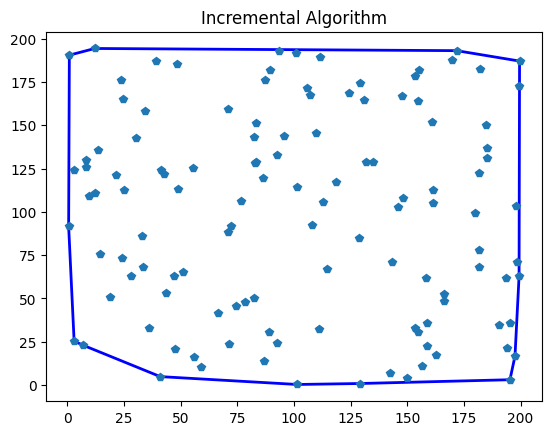



Gift Wrapping took 0.0011 seconds.
Gift Wrapping Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 2  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 3  |  12.1627   | 194.413    |
+----------+------------+------------+
| Point 4  | 171.803    | 193.153    |
+----------+------------+------------+
| Point 5  | 199.54     | 187.134    |
+----------+------------+------------+
| Point 6  | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 7  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 10 | 101.452    |   0.262704 |
+----------+------------+------------+
| Point 11 |  41.0489 

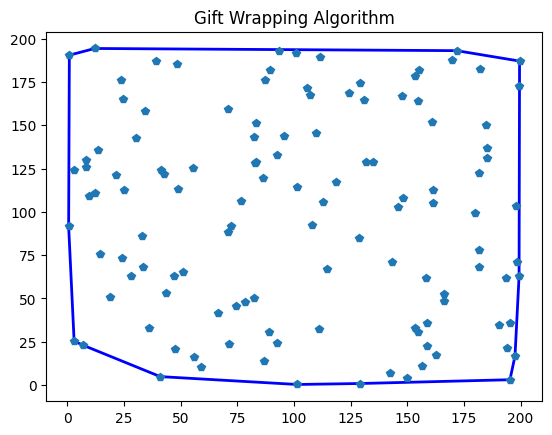



QuickHull took 0.0010 seconds.
QuickHull Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 2  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 3  |   3.06573  |  25.277    |
+----------+------------+------------+
| Point 4  |   7.19606  |  22.849    |
+----------+------------+------------+
| Point 5  |  41.0489   |   4.81123  |
+----------+------------+------------+
| Point 6  | 101.452    |   0.262704 |
+----------+------------+------------+
| Point 7  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 10 | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 11 | 199.54     | 187.

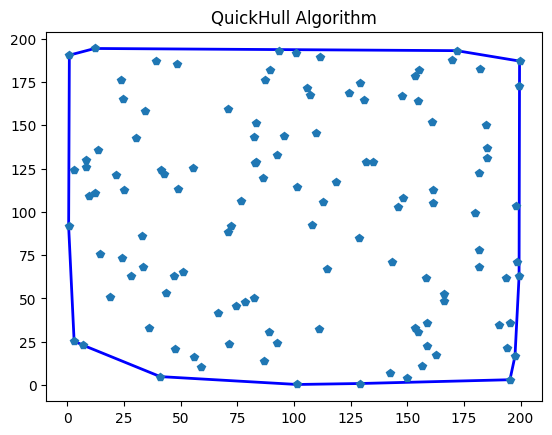



Divide and Conquer took 0.0031 seconds.
Divide and Conquer Algorithm - Generated points:
+----------+------------+------------+
| #        |          X |          Y |
+==========+============+============+
| Point 1  |   0.953421 | 190.554    |
+----------+------------+------------+
| Point 2  |   0.644822 |  91.5746   |
+----------+------------+------------+
| Point 3  |   3.06573  |  25.277    |
+----------+------------+------------+
| Point 4  |   7.19606  |  22.849    |
+----------+------------+------------+
| Point 5  |  41.0489   |   4.81123  |
+----------+------------+------------+
| Point 6  | 101.452    |   0.262704 |
+----------+------------+------------+
| Point 7  | 129.252    |   0.823849 |
+----------+------------+------------+
| Point 8  | 195.304    |   3.00701  |
+----------+------------+------------+
| Point 9  | 197.528    |  16.6441   |
+----------+------------+------------+
| Point 10 | 199.327    |  62.7308   |
+----------+------------+------------+
| Point 11 |

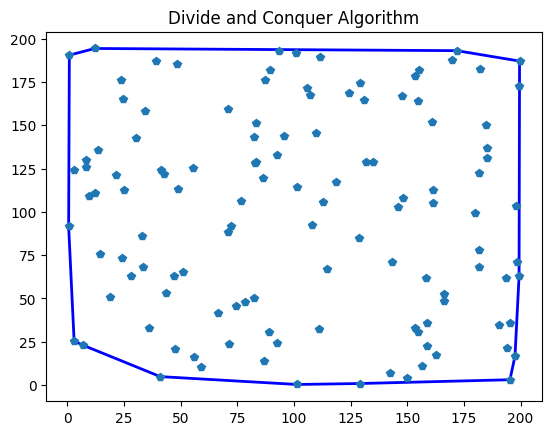




QUESTION 2


Testing with 1000 points...


Testing with 50000 points...


Testing with 200000 points...


Testing with 1000000 points...


Benchmark Results:
Points     Incremental     Gift Wrapping   QuickHull       Divide and Conquer  
1000       0.0095          0.0164          0.0022          0.0259              
50000      0.4584          0.8044          0.1824          1.0447              
200000     1.3668          3.1640          0.3969          10.8957             
1000000    7.3284          20.5721         2.4261          37.3425             


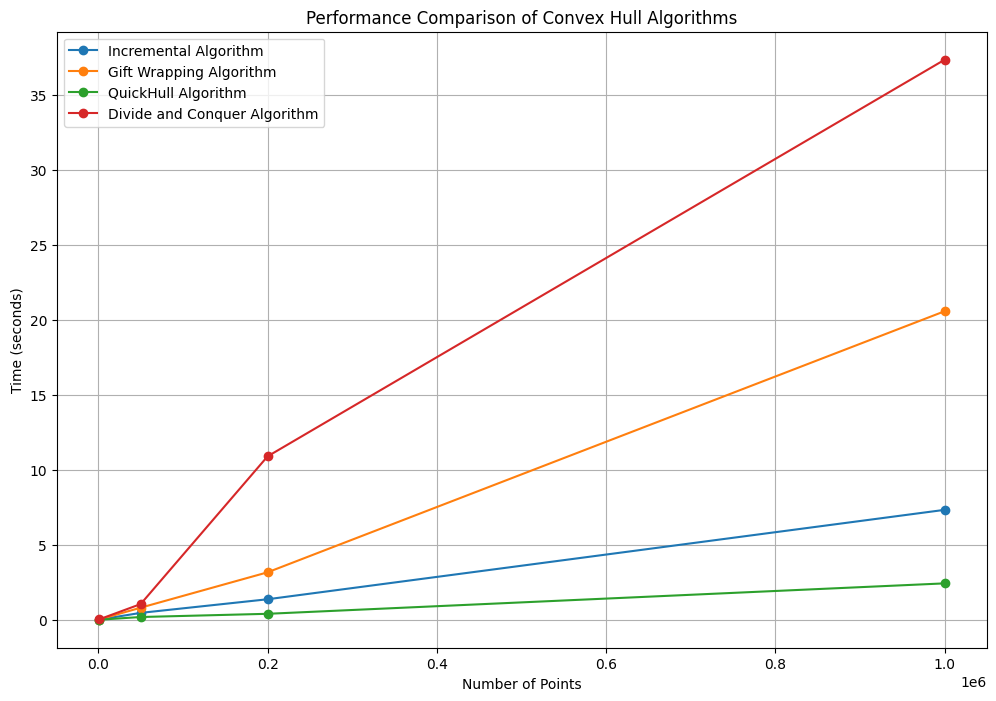

In [ ]:
def main():

    # QUESTION 1
    print(f"\033[1m\n\nQUESTION 1\033[0m")
    num_points_list = [120]
    benchmark_algorithms(num_points_list)

    # QUESTION 2
    print(f"\033[1m\n\n\nQUESTION 2\n\033[0m")
    num_points_list = [1000, 50000, 200000, 1000000]  # Different point sets for comparison
    benchmark_algorithms(num_points_list, 2)

if __name__ == '__main__':
    main()

**Παρατηρήσεις**

**1. Incremental Algorithm**
Πολυπλοκότητα: Συνήθως 𝑂(𝑛^2) για τον υπολογισμό της κυρτής πολυγωνικής. Αυτή η πολυπλοκότητα προκύπτει από την ανάγκη ελέγχου όλων των προηγουμένων σημείων για τη διατήρηση της κυρτότητας , παρά την αρχική ταξινόμηση που έχει πολυπλοκότητα 𝑂(𝑛log𝑛).

Παρατήρηση: Ο χρόνος εκτέλεσης αυξάνεται σημαντικά με την αύξηση του αριθμού των σημείων, κάτι που είναι αναμενόμενο λόγω της τετραγωνικής πολυπλοκότητας. Για μικρές εισόδους (1000 σημεία), ο χρόνος είναι λογικός, αλλά γίνεται πολύ πιο αργός καθώς αυξάνεται ο αριθμός των σημείων.

**2. Gift Wrapping Algorithm**
Πολυπλοκότητα: Ο αλγόριθμος Gift Wrapping (γνωστός και ως Jarvis March) έχει χειρότερη περίπτωση πολυπλοκότητας 𝑂(𝑛ℎ), όπου ℎ είναι ο αριθμός των σημείων στο περίγραμμα. Στη χειρότερη περίπτωση, αυτό μπορεί να φτάσει κοντά στο
𝑂(𝑛^2) αν το περίγραμμα είναι σχεδόν ίσο με τον αριθμό των σημείων.

Παρατήρηση: Ο αλγόριθμος αυτός επίσης δείχνει αύξηση στον χρόνο εκτέλεσης με αυξανόμενα δεδομένα, και εκτελείται χειρότερα από τον QuickHull για μεγαλύτερες εισόδους. Για 1.000.000 σημεία, ο χρόνος εκτέλεσης είναι σημαντικά αργός, που αντικατοπτρίζει την πολυπλοκότητα 𝑂(𝑛ℎ).

**3. QuickHull Algorithm**
Πολυπλοκότητα: Ο QuickHull έχει μέση περίπτωση πολυπλοκότητας 𝑂(𝑛log⁡𝑛), αλλά μπορεί να επιδεινωθεί σε 𝑂(𝑛^2) στη χειρότερη περίπτωση. Η απόδοσή του τείνει να είναι καλύτερη από τους άλλους αλγορίθμους για πολλές πρακτικές περιπτώσεις.

Παρατήρηση: Ο QuickHull αποδίδει πολύ καλά, ακόμη και για μεγάλες εισόδους, και ο χρόνος εκτέλεσης αυξάνεται πιο αργά σε σύγκριση με τους Incremental και Gift Wrapping αλγορίθμους. Αυτό είναι σύμφωνο με την πολυπλοκότητα 𝑂(𝑛log⁡𝑛) μέσης περίπτωσης. Είναι ο ταχύτερος από τους τέσσερις αλγορίθμους για όλα τα μεγέθη εισόδων που δοκιμάστηκαν.

**4. Divide and Conquer Algorithm**

Πολυπλοκότητα: Ο αλγόριθμος αυτός έχει μέση περίπτωση πολυπλοκότητας   
𝑂(𝑛log⁡𝑛), παρόμοια με τον QuickHull, αλλά μπορεί να είναι πιο περίπλοκος στην υλοποίηση λόγω της αναδρομικής φύσης του.

Παρατήρηση: Αν και αποδίδει ικανοποιητικά για μικρές και μεσαίες εισόδους, ο χρόνος εκτέλεσης αυξάνεται γρήγορα για πολύ μεγάλες εισόδους. Για 1.000.000 σημεία, είναι ο πιο αργός από τους δοκιμασμένους αλγόριθμους. Αυτό αντικατοπτρίζει το κόστος των αναδρομικών κλήσεων και των βημάτων συγχώνευσης, που μπορεί να είναι σημαντικό για μεγάλα σύνολα δεδομένων.

**Γενικές Παρατηρήσεις**

Αρχικά, δεν παρατηρούμε διαφορές παρατηρώντας τα figures των 4 αλγορίθμων, αφού όπως γνωρίζουμε και από την θεωρία:
Το κυρτό περίβλημα ενός πεπερασμένου συνόλου P από σημεία στο επίπεδο είναι το μοναδικό κυρτό πολύγωνο του οποίου όλες οι κορυφές είναι σημεία του P και το οποίο περιέχει
όλα τα σημεία του P.

Οι αλγόριθμοι QuickHull και Divide and Conquer είναι γενικά πιο κλιμακούμενοι και αποδοτικοί για μεγάλες εισόδους σε σύγκριση με τους Incremental και Gift Wrapping αλγορίθμους. Αυτό είναι σύμφωνο με την πολυπλοκότητά τους 𝑂(𝑛log𝑛) σε σχέση με την 𝑂(𝑛^2) πολυπλοκότητα των άλλων δύο αλγορίθμων.

Τάσεις Απόδοσης:
Για μικρές εισόδους (1.000 σημεία), η διαφορά στους χρόνους εκτέλεσης είναι λιγότερο έντονη, αλλά καθώς ο αριθμός των σημείων αυξάνεται, ο QuickHull αποδίδει συνεχώς καλύτερα.
Η απόδοση των Incremental και Gift Wrapping αλγορίθμων επιδεινώνεται πιο γρήγορα με την αύξηση του μεγέθους εισόδου σε σύγκριση με τους QuickHull και Divide and Conquer.
Ο αλγόριθμος Divide and Conquer, αν και αποδίδει καλά για μικρές και μεσαίες εισόδους, γίνεται ο πιο αργός για πολύ μεγάλες εισόδους λόγω του αναδρομικού και συγχωνευτικού κόστους.


**Υλοποίηση Β: Γραμμικός Προγραμματισμός**

In [ ]:
# Question 1
# Implementation of the incremental algorithm (Siedel)

# Function to find the intersection of two lines
def find_intersection(constraint1, constraint2):
    a1, b1, c1 = constraint1
    a2, b2, c2 = constraint2
    A = np.array([[a1, b1], [a2, b2]])
    B = np.array([c1, c2])

    if np.linalg.det(A) == 0:
        return None  # The lines are parallel (no intersection)

    return np.linalg.solve(A, B)

# Function to check if a point satisfies all constraints
def is_feasible(point, constraints):
    for (a, b, c) in constraints:
        if a*point[0] + b*point[1] > c:  # If point violates any constraint
            return False

    return True

# Incremental algorithm function
def incremental_algorithm(constraints, objective):
    """
    Implementation of the incremental algorithm
    constraints: list of constraints (a, b, c) for ax1 + bx2 ≤ c
    objective: vector of the objective function coefficients [c1, c2]
    Returns the optimal point and the value of the objective function at that point.
    """
    n = len(constraints)  # Number of constraints

    best_point = None
    best_value = -np.inf  # Start with the worst possible value (-infinity)

    for i in range(n):
        for j in range(i):
            # Find the intersection of lines i and j
            intersection = find_intersection(constraints[i], constraints[j])

            # If the intersection exists and is feasible with the current constraints
            if intersection is not None and is_feasible(intersection, constraints[:i+1]):
                value = np.dot(objective, intersection)  # Calculate the value of the objective function

                # Update the best value and point if this one is better
                if value > best_value:
                    best_value = value
                    best_point = intersection

    # If no feasible point was found, return "Infeasible"
    if best_point is None:
        return "Infeasible"

    return best_point, best_value

def plot_constraint(constraint, label=None):
    a, b, c = constraint
    if b != 0:
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = (c - a*x_vals) / b
    else:
        x_vals = np.full_like(np.array(plt.gca().get_ylim()), -c/a)
        y_vals = np.array(plt.gca().get_ylim())
    plt.plot(x_vals, y_vals, label=label)

**main function - Υλοποίηση**

Optimal point: [3.5 0.5]
Optimal value: 23.5


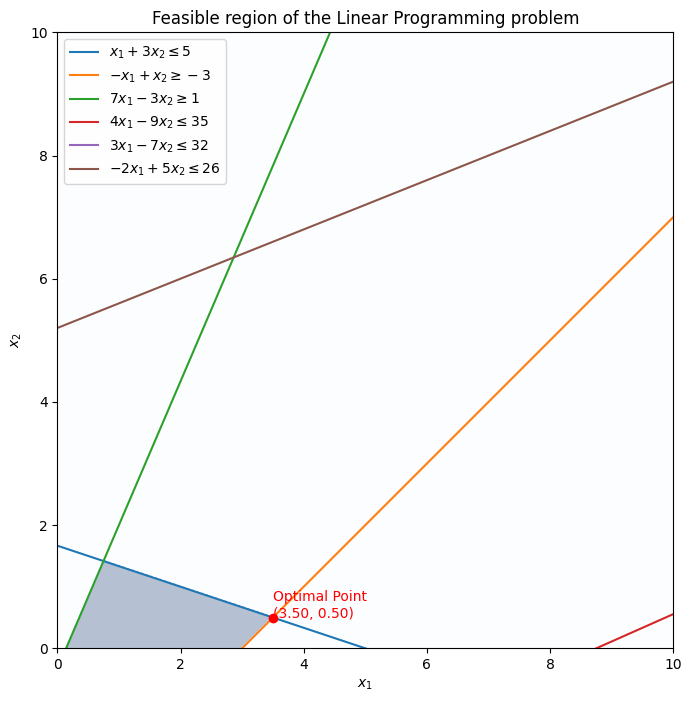

In [ ]:
# Question 2
# Solution of linear programming problem (using the incremental algorithm), Feasible region Figure

def main():
    # Define constraints
    constraints = [
        (1, 3, 5),   # x1 + 3x2 ≤ 5
        (-1, 1, -3), # -x1 + x2 ≥ -3  => x1 - x2 ≤ 3
        (7, -3, 1),  # 7x1 - 3x2 ≥ 1  => -7x1 + 3x2 ≤ -1
        (4, -9, 35), # 4x1 - 9x2 ≤ 35
        (3, -7, 32), # 3x1 - 7x2 ≤ 32
        (-2, 5, 26), # -2x1 + 5x2 ≤ 26
        (1, 0, 0),   # x1 ≥ 0
        (0, 1, 0)    # x2 ≥ 0
    ]

    # Objective function
    objective = np.array([5, 12])

    # Find the solution using the incremental algorithm
    optimal_point, optimal_value = incremental_algorithm(constraints, objective)
    print("Optimal point:", optimal_point)
    print("Optimal value:", optimal_value)

    # Create a grid of values for x1 and x2
    x1 = np.linspace(0, 10, 400)
    x2 = np.linspace(0, 10, 400)
    X1, X2 = np.meshgrid(x1, x2)

    # Initial plot setup
    plt.figure(figsize=(8, 8))

    # Define the constraints as conditions
    inequalities = [
        (X1 + 3*X2 <= 5),
        (X1 - X2 <= 3),
        (-7*X1 + 3*X2 <= -1),
        (4*X1 - 9*X2 <= 35),
        (3*X1 - 7*X2 <= 32),
        (-2*X1 + 5*X2 <= 26),
        (X1 >= 0),
        (X2 >= 0),
    ]

    # Display the feasible region
    feasible_region = np.ones_like(X1, dtype=bool)
    for inequality in inequalities:
        feasible_region &= inequality

    plt.imshow(feasible_region.astype(int), extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin="lower", cmap="Blues", alpha=0.3)

    # Plot the constraint lines
    plot_constraint((1, 3, 5), r'$x_1 + 3x_2 \leq 5$')
    plot_constraint((-1, 1, -3), r'$-x_1 + x_2 \geq -3$')
    plot_constraint((7, -3, 1), r'$7x_1 - 3x_2 \geq 1$')
    plot_constraint((4, -9, 35), r'$4x_1 - 9x_2 \leq 35$')
    plot_constraint((3, -7, 32), r'$3x_1 - 7x_2 \leq 32$')
    plot_constraint((-2, 5, 26), r'$-2x_1 + 5x_2 \leq 26$')

    # Add the optimal point to the plot
    plt.scatter(optimal_point[0], optimal_point[1], color='red', zorder=5)
    plt.text(optimal_point[0], optimal_point[1], f'Optimal Point\n({optimal_point[0]:.2f}, {optimal_point[1]:.2f})', color='red')

    # Labels and axis limits
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title('Feasible region of the Linear Programming problem')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == '__main__':
    main()

**Υλοποίηση Γ: Διάγραμμα Voronoi - Τριγωνοποίηση Delaunay**

<Figure size 800x800 with 0 Axes>

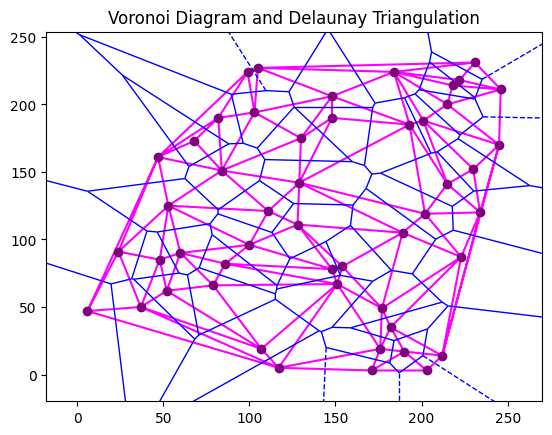


Voronoi Diagram: 0.00127363 seconds for 50 points
Delaunay Triangulation: 0.00079107 seconds for 50 points


In [ ]:
# 1. Illustration of the correspondence between the Delaunay triangulation and the Voronoi diagram for a set 𝑃 of 𝑛 points
def plot_voronoi_delaunay():
    # Number of points
    num_points = 50

    # Generate random points
    points = np.random.randint(0, 250, (num_points, 2))

    # Voronoi Diagram
    start_voronoi = time.time()
    voronoi_diagram = Voronoi(points)
    end_voronoi = time.time()

    # Delaunay Triangulation
    start_delaunay = time.time()
    delaunay_triangulation = Delaunay(points)
    end_delaunay = time.time()

    # Plotting
    plt.figure(figsize=(8, 8))
    voronoi_plot_2d(voronoi_diagram, show_vertices=False, line_colors='blue')
    plt.triplot(points[:, 0], points[:, 1], delaunay_triangulation.simplices, color='magenta')
    plt.plot(points[:, 0], points[:, 1], 'o', color='purple')
    plt.title('Voronoi Diagram and Delaunay Triangulation')
    plt.show()

    # Print computation times
    print(f"\nVoronoi Diagram: {end_voronoi - start_voronoi:.8f} seconds for {num_points} points")
    print(f"Delaunay Triangulation: {end_delaunay - start_delaunay:.8f} seconds for {num_points} points")

if __name__ == '__main__':
    plot_voronoi_delaunay()

**Delaunay Triangulation**

| n         | Voronoi    | Delaunay   |
|-----------|------------|------------|
| 50        | 0.00757337 | 0.00090599 |
| 100       | 0.00284886 | 0.00111055 |
| 1.000     | 0.01361108 | 0.00859737 |
| 10.000    | 0.33079243 | 0.33079243 |
| 100.000   | 2.25415683 | 1.32467723 |
| 1.000.000 | 9.20824170 | 7.51506066 |

**2. Σχολιασμός αποτελεσμάτων**

**Παρατηρήσεις:**
Για την υλοποίηση αυτού του ερωτήματος χρησιμοποιήθηκε η βιβλιοθηκή sciPy που περιέχει συναρτήσεις για την δημιουργία του διαγράμματος Voronoi και της τριγωνοποίησης Delaunay.
Από την γραφική παράσταση βλέπουμε ότι η τριγωνοποίηση Delaunay είναι o δυικός γράφος του διαγράμματος Voronoi.

**Πολυπλοκότητα:**
Η πολυπλοκότητα των αλγορίθμων για την κατασκευή του διαγράμματος Voronoi και της τριγωνοποίησης Delaunay εξαρτάται άμεσα από το πλήθος των σημείων 𝑛 στο σύνολο 𝑃.
Η πολυπλοκότητα είναι πολυωνυμική  Ο(nlogn). Καθώς το πλήθος των σημείων
𝑛 αυξάνεται, η πολυπλοκότητα του αλγορίθμου αυξάνεται, επηρεάζοντας τον χρόνο εκτέλεσης. Το γεγονός ότι οι χρόνοι εκτέλεσης και οι πολυπλοκότητες των δύο διαδικασιών είναι σχεδόν ίδιες οφείλεται στη σχέση δυισμού που τις συνδέει.

**Υλοποίηση Δ: Γεωμετρική Αναζήτηση**

In [ ]:
class KDTreeNode:
    def __init__(self, point, depth, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
        self.depth = depth

def build_kd_tree(points, depth=0):
    if not points:
        return None

    axis = depth % 2
    sorted_points = sorted(points, key=lambda p: p[axis])
    median_index = len(sorted_points) // 2

    return KDTreeNode(
        point=sorted_points[median_index],
        left=build_kd_tree(sorted_points[:median_index], depth + 1),
        right=build_kd_tree(sorted_points[median_index + 1:], depth + 1),
        depth=depth
    )

def point_within_range(point, query_range):
    x, y = point
    x_min, x_max = query_range[0]
    y_min, y_max = query_range[1]
    return x_min <= x <= x_max and y_min <= y <= y_max

def range_intersects(node_range, query_range):
    node_x_min, node_x_max, node_y_min, node_y_max = node_range
    query_x_min, query_x_max = query_range[0]
    query_y_min, query_y_max = query_range[1]

    return not (node_x_max < query_x_min or node_x_min > query_x_max or
                node_y_max < query_y_min or node_y_min > query_y_max)

def calculate_node_range(node):
    if node is None:
        return [float('inf'), float('-inf'), float('inf'), float('-inf')]

    node_x, node_y = node.point
    left_range = calculate_node_range(node.left) if node.left else [node_x, node_x, node_y, node_y]
    right_range = calculate_node_range(node.right) if node.right else [node_x, node_x, node_y, node_y]

    return [min(node_x, left_range[0], right_range[0]),
            max(node_x, left_range[1], right_range[1]),
            min(node_y, left_range[2], right_range[2]),
            max(node_y, left_range[3], right_range[3])]

def query_kd_tree(node, query_range):
    if node is None:
        return []

    results = []
    node_range = calculate_node_range(node)

    if point_within_range(node.point, query_range):
        results.append(node.point)

    if node.left and range_intersects(calculate_node_range(node.left), query_range):
        results.extend(query_kd_tree(node.left, query_range))

    if node.right and range_intersects(calculate_node_range(node.right), query_range):
        results.extend(query_kd_tree(node.right, query_range))

    return results

def plot_kd_tree(node, x_min, x_max, y_min, y_max, query_range, depth=0):
    if node is None:
        return

    point = node.point
    axis = depth % 2

    plt.plot(point[0], point[1], 'bo')  # Plot the point

    if axis == 0:  # Vertical division
        plt.plot([point[0], point[0]], [y_min, y_max], 'm--')  # Draw the vertical line
        plot_kd_tree(node.left, x_min, point[0], y_min, y_max, query_range, depth + 1)  # Left side
        plot_kd_tree(node.right, point[0], x_max, y_min, y_max, query_range, depth + 1)  # Right side
    else:  # Horizontal division
        plt.plot([x_min, x_max], [point[1], point[1]], 'm--')  # Draw the horizontal line
        plot_kd_tree(node.left, x_min, x_max, y_min, point[1], query_range, depth + 1)  # Bottom side
        plot_kd_tree(node.right, x_min, x_max, point[1], y_max, query_range, depth + 1)  # Top side

    if depth == 0:  # After the last recursion, plot the query box
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('KD Tree and Query Range')
        qx_min, qx_max = query_range[0]
        qy_min, qy_max = query_range[1]
        plt.plot([qx_min, qx_max, qx_max, qx_min, qx_min], [qy_min, qy_min, qy_max, qy_max, qy_min], 'c--')
        plt.show()

def plot_points(points):
    plt.scatter(*zip(*points), color='cyan', marker='o')

def generate_random_query_range():
    x_min, x_max = sorted([random.randint(0, 100) for _ in range(2)])
    y_min, y_max = sorted([random.randint(0, 100) for _ in range(2)])
    return [(x_min, x_max), (y_min, y_max)]

Visualizing the steps of constructing the range tree:


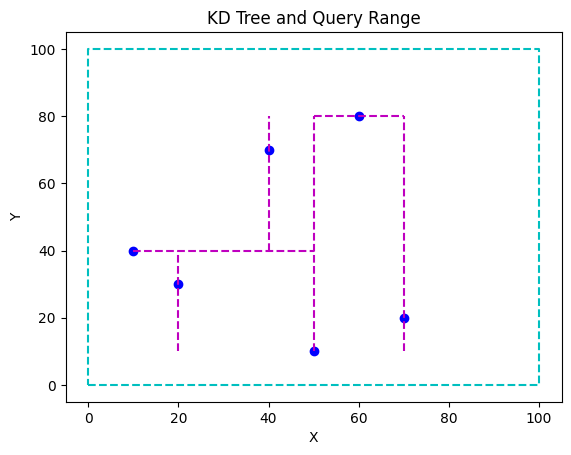


Set of Points:
[[ 49  28]
 [ 34  77]
 [ 29  88]
 [ 99  27]
 [ 32  55]
 [ 37  83]
 [ 67  98]
 [ 34   4]
 [ 95  76]
 [ 58  34]
 [ 68  12]
 [  3  33]
 [ 18  30]
 [ 79   5]
 [ 68  40]
 [  3  91]
 [ 77  21]
 [ 33  97]
 [ 68  49]
 [ 14  63]
 [ 22  70]
 [ 25   1]
 [ 61  28]
 [  8  36]
 [ 18  52]
 [ 36  74]
 [ 14   3]
 [  2  91]
 [ 65  55]
 [ 15  25]
 [ 84  41]
 [ 61  47]
 [ 99  97]
 [ 51  43]
 [ 97  71]
 [ 15  27]
 [ 11  60]
 [ 81  15]
 [ 46   6]
 [ 51  17]
 [ 93  15]
 [100  99]
 [ 69   0]
 [ 23  69]
 [ 54  52]
 [ 11  62]
 [ 33  47]
 [ 41  20]
 [ 70  80]
 [ 81  14]
 [ 59  78]
 [ 66  53]
 [ 25  30]
 [ 93  63]
 [ 62  75]
 [ 24  91]
 [ 60  20]
 [ 14  39]
 [ 21   5]
 [ 56  51]
 [ 60  90]
 [ 56  28]
 [100  68]
 [ 16  55]
 [ 32  96]
 [ 99  46]
 [ 75  86]
 [  8  55]
 [ 10   3]
 [ 44  50]
 [ 55  15]
 [ 90  75]
 [ 19  15]
 [  2  63]
 [ 12  15]
 [ 30  83]
 [ 38  67]
 [  2  58]
 [ 19  65]
 [ 78   7]
 [  3  90]
 [ 51  43]
 [ 21  38]
 [ 69  86]
 [  9  93]
 [ 46  92]
 [ 21  88]
 [ 14  31]
 [ 90  87]
 [ 61

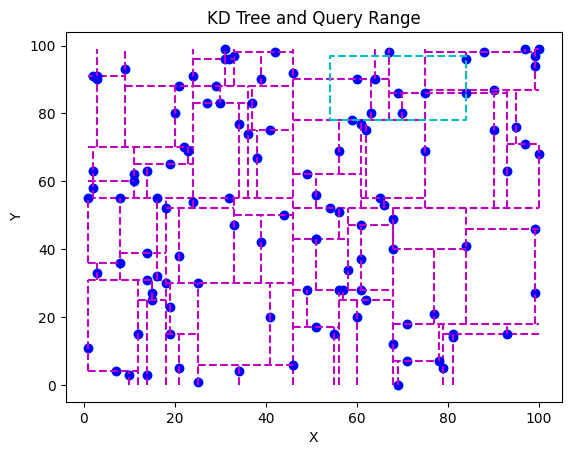


Points within the Query Range:
[59, 78]
[60, 90]
[63, 80]
[64, 90]
[69, 86]
[70, 80]
[75, 86]
[84, 86]
[84, 96]
Range search completed in 0.00127 seconds


In [ ]:
def main():
    # Small set of points for visualizing the construction steps
    small_points = np.array([(20, 30), (40, 70), (10, 40), (50, 10), (60, 80), (70, 20)])
    plt.figure()
    print("Visualizing the steps of constructing the range tree:")

    # Build the KD-Tree from the small set of points
    kd_tree = build_kd_tree(small_points.tolist())

    # Plot the KD-Tree with boundaries for better visualization
    plot_kd_tree(kd_tree, np.min(small_points[:, 0]), np.max(small_points[:, 0]),
                 np.min(small_points[:, 1]), np.max(small_points[:, 1]), [(0, 100), (0, 100)])

    # Larger set of points for search operations
    num_points = 120
    points = np.array([(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_points)])

    print("\nSet of Points:")
    print(points)

    # Measure the time taken to build the KD-Tree
    start_time = time.time()
    kd_tree = build_kd_tree(points.tolist())
    end_time = time.time()
    print(f"KD-Tree construction completed in {end_time - start_time:.5f} seconds")

    # Generate a random query range for searching within the KD-Tree
    query_range = generate_random_query_range()
    print("\nQuery Range:")
    print(query_range)

    # Plot the set of points and the KD-Tree along with the query range
    plot_points(points)
    plot_kd_tree(kd_tree, np.min(points[:, 0]), np.max(points[:, 0]),
                 np.min(points[:, 1]), np.max(points[:, 1]), query_range)

    # Measure the time taken to perform the range search in the KD-Tree
    start_time = time.time()
    found_points = query_kd_tree(kd_tree, query_range)
    end_time = time.time()

    # Print the points found within the query range
    print("\nPoints within the Query Range:")
    for point in found_points:
        print(point)

    # Output the time taken for the range search
    print(f"Range search completed in {end_time - start_time:.5f} seconds")

if __name__ == '__main__':
    main()

Στην οπτικοποίηση που παράγει ο κώδικας, βλέπουμε τα εξής:

**1. Σημεία στο Επίπεδο:**
Μπλε Κύκλοι (Points): Κάθε σημείο που υπάρχει στο επίπεδο, το οποίο αποτελεί μέρος του συνόλου σημείων που δόθηκαν ως είσοδος για την κατασκευή του KD Tree, απεικονίζεται ως μπλε κύκλος.

**2. Διαχωριστικές Γραμμές (Splitting Lines):**
Κάθετος Διαχωρισμός (Vertical Splitting Lines): Οι διαχωριστικές γραμμές που χωρίζουν τα δεδομένα με βάση τον άξονα
𝑥, απεικονίζονται ως κάθετες διακεκομμένες γραμμές (m--). Αυτές οι γραμμές αντιπροσωπεύουν το επίπεδο διαίρεσης του χώρου κατά τη διάρκεια της κατασκευής του KD Tree.
Οριζόντιος Διαχωρισμός (Horizontal Splitting Lines): Οι διαχωριστικές γραμμές που χωρίζουν τα δεδομένα με βάση τον άξονα
𝑦, απεικονίζονται ως οριζόντιες διακεκομμένες γραμμές. Αυτές οι γραμμές αντιπροσωπεύουν τα επίπεδα διαίρεσης για τον άξονα 𝑦.

**3. Ορθογώνια Περιοχή Αναζήτησης (Query Range):**
Γαλάζιο Διακεκομμένο Πλαίσιο (Cyan Dashed Box): Το γαλάζιο διακεκομμένο πλαίσιο απεικονίζει την ορθογώνια περιοχή αναζήτησης, δηλαδή τα όρια εντός των οποίων ψάχνουμε να βρούμε τα σημεία του συνόλου που ανήκουν σε αυτή την περιοχή.

**4. Αποτελέσματα Αναζήτησης:**
Τα σημεία που βρίσκονται εντός της ορθογώνιας περιοχής αναζήτησης δεν επισημαίνονται διαφορετικά στο διάγραμμα, αλλά εμφανίζονται στη λίστα αποτελεσμάτων που εκτυπώνεται στο τερματικό. Εκεί μπορείτε να δείτε τις συντεταγμένες των σημείων που ανήκουν στο πλαίσιο της περιοχής αναζήτησης.

**5. Βήματα Κατασκευής KD Tree:**
Σε μια οπτικοποίηση μικρού συνόλου σημείων, μπορείτε να δείτε τα βήματα κατασκευής του KD Tree. Καθώς το δέντρο κατασκευάζεται, κάθε νέο επίπεδο του δέντρου διαχωρίζει τον χώρο με μια νέα γραμμή (κάθετη ή οριζόντια) ανάλογα με το βάθος του κόμβου στο δέντρο. Με αυτόν τον τρόπο, μπορούμε να καταλάβουμε πώς το δέντρο κατακερματίζει τον χώρο για να διευκολύνει τις γρήγορες αναζητήσεις.
Αυτή η οπτικοποίηση είναι ιδιαίτερα χρήσιμη για την κατανόηση του πώς το KD Tree χωρίζει τα δεδομένα και πώς πραγματοποιείται η αναζήτηση σε αυτό.